In [2]:
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt



sns.set_theme()


In [3]:
from plot.run_info import plot_data_output_dir, run_collections

In [4]:
pt_dfs = torch.load(f"{plot_data_output_dir}/antmaze_umaze_v2.pt")
df = pt_dfs["baseline"]


In [6]:
df

,eval/1.0_normalized_score_std,eval/0.5_normalized_score_mean,_timestamp,learning_rate,eval/1.0_return_std,eval/0.5_normalized_score_std,loss,eval/0.5_return_mean,eval/1.0_normalized_score_mean,_step,_runtime,eval/0.5_return_std,eval/1.0_return_mean
0,0.0,0.0,1.695861e+09,2.000000e-08,0.0,0.0,0.709659,0.0,0.0,0,99.436518,0.0,0.0
1,NaN,NaN,1.695861e+09,1.020000e-06,NaN,NaN,0.698068,NaN,NaN,100,101.458688,NaN,NaN
2,NaN,NaN,1.695861e+09,2.020000e-06,NaN,NaN,0.658075,NaN,NaN,200,103.858909,NaN,NaN
3,NaN,NaN,1.695861e+09,3.020000e-06,NaN,NaN,0.631778,NaN,NaN,300,106.297691,NaN,NaN
4,NaN,NaN,1.695861e+09,4.020000e-06,NaN,NaN,0.582106,NaN,NaN,400,108.608897,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,1.695873e+09,1.000000e-04,NaN,NaN,0.099455,NaN,NaN,99500,11771.133296,NaN,NaN
996,NaN,NaN,1.695873e+09,1.000000e-04,NaN,NaN,0.123127,NaN,NaN,99600,11773.343903,NaN,NaN
997,NaN,NaN,1.695873e+09,1.000000e-04,NaN,NaN,0.100526,NaN,NaN,99700,11775.567850,NaN,NaN
998,NaN,NaN,1.695873e+09,1.000000e-04,NaN,NaN,0.115905,NaN,NaN,99800,11777.901812,NaN,NaN


In [7]:
df.keys()

Index(['eval/1.0_normalized_score_std', 'eval/0.5_normalized_score_mean',
       '_timestamp', 'learning_rate', 'eval/1.0_return_std',
       'eval/0.5_normalized_score_std', 'loss', 'eval/0.5_return_mean',
       'eval/1.0_normalized_score_mean', '_step', '_runtime',
       'eval/0.5_return_std', 'eval/1.0_return_mean'],
      dtype='object')

In [11]:
key_pairs = {}
for key in df.keys():
    if "eval/" in key and "return_" in key:
        return_value = key.lstrip("eval/").split("_", 1)[0]
        if return_value not in key_pairs:
            key_pairs[return_value] = {}
        if "_std" in key:
            key_pairs[return_value]['std']=key
        elif "_mean" in key:
            key_pairs[return_value]['mean']=key
            

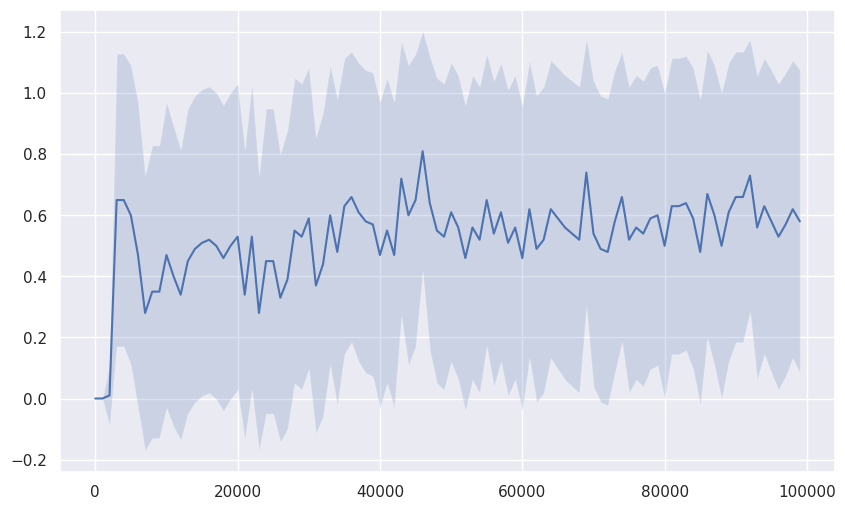

In [25]:
ret_value='1.0'
d = df[[key_pairs[ret_value]['mean'], key_pairs[ret_value]['std'], '_step']].dropna()

plt.figure(figsize=(10, 6))
plt.plot(d['_step'], d[key_pairs[ret_value]['mean']])
plt.fill_between(d['_step'], d[key_pairs[ret_value]['mean']] - d[key_pairs[ret_value]['std']], d[key_pairs[ret_value]['mean']] + d[key_pairs[ret_value]['std']], alpha=0.2)
    

In [19]:
_df['eval/1.0_return_mean'] - _df['eval/1.0_return_std']

0      0.000000
10     0.000000
20    -0.090000
30     0.170628
40     0.170628
         ...   
950    0.083955
960    0.028386
970    0.072430
980    0.132168
990    0.083955
Length: 100, dtype: float64

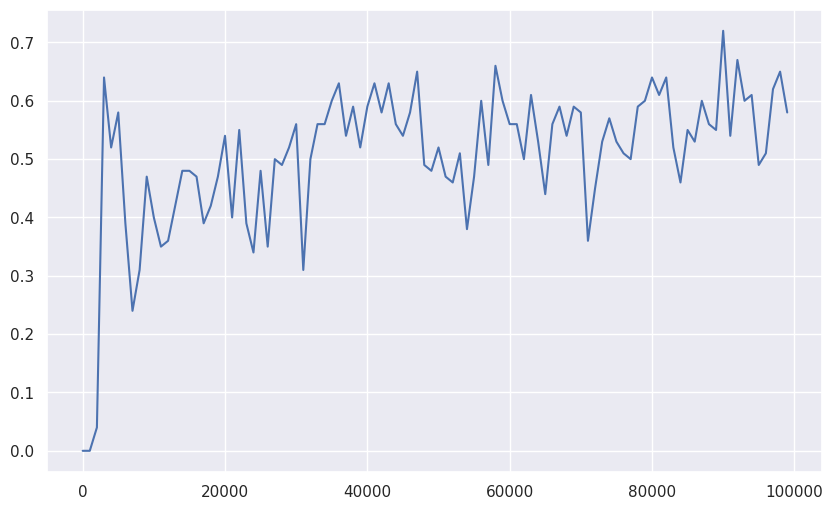

In [5]:
to_plot = df[["_step", "eval/1.0_return_mean"]].dropna()

plt.figure(figsize=(10, 6))
plt.plot(to_plot["_step"], to_plot["eval/1.0_return_std"], label="baseline")
plt.fill_between(